In [40]:
using CSV, DataFrames, Dates
using CairoMakie
using Statistics

# include("./src/eda.jl")

In [2]:
function events_histogram(df, region)
 
    set_theme!(Theme(fonts=(; regular="CMU Serif")))
    fig = Figure(size = (700, 500), font= "CMU Serif",) ## probably you need to install this font in your system

    ax = Axis(fig[1, 1], xlabel = L"M", ylabel = L"N", ylabelsize = 26,
    xlabelsize = 22, xgridstyle = :dash, ygridstyle = :dash, xtickalign = 1,
    xticksize = 5, ytickalign = 1, yticksize = 5 , xlabelpadding = 10, ylabelpadding = 10)

    hist!(ax, df[:,:Magnitude], bins = 40, label = "number of events")

    axislegend(ax, position = :rt, backgroundcolor = (:grey90, 0.25), labelsize=18);

    save("./eda_results/$region/$(region)_histogram_events_magnitudes.png",fig, px_per_unit=5)
    return fig
end

events_histogram (generic function with 1 method)

In [3]:
region = "Romania"
df = CSV.read("./data/$region.csv", DataFrame)

Row,Datetime,Latitude,Longitude,Depth,Magnitude
,DateTime,Float64,Float64,Float64,Float64
1,1977-03-04T19:21:54.100,45.77,26.76,94.0,7.4
2,1977-03-04T21:21:01.100,45.22,26.65,141.0,3.0
3,1977-03-04T21:28:07.400,45.23,26.87,22.0,1.5
4,1977-03-04T23:17:14,45.0,27.2,33.0,2.5
5,1977-03-05T00:00:45.900,45.48,27.09,104.2,4.2
6,1977-03-05T00:08:37.700,45.4,27.16,22.2,3.0
7,1977-03-05T00:13:04,45.5,27.2,77.0,3.2
8,1977-03-05T00:47:55.100,45.37,27.31,20.7,2.3
9,1977-03-05T02:35:22,45.63,26.19,121.3,3.0


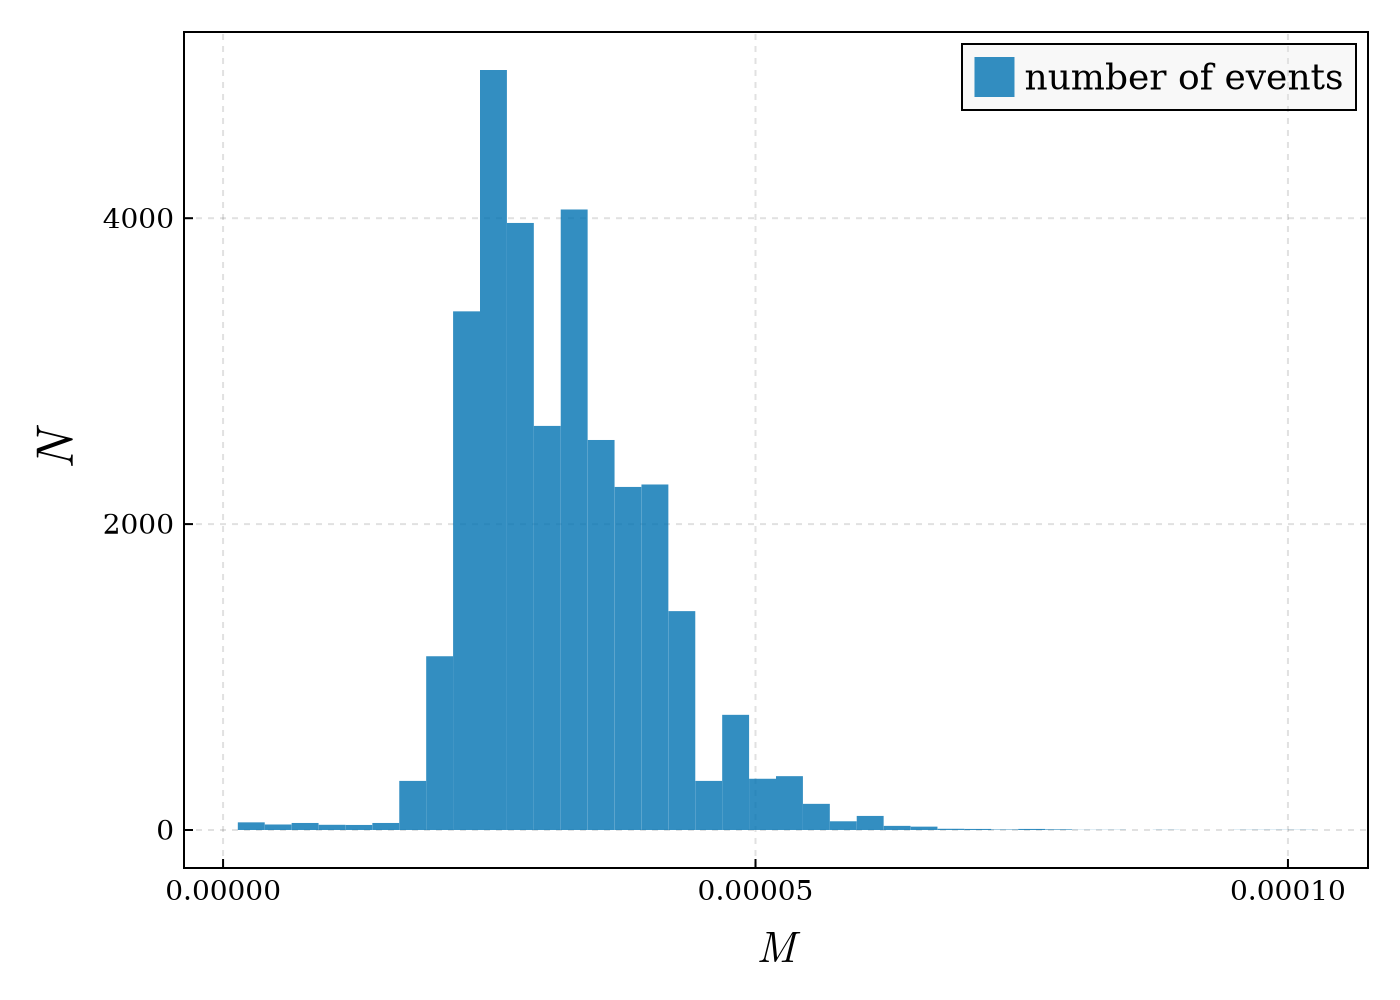

In [6]:
set_theme!(Theme(fonts=(; regular="CMU Serif")))
fig = Figure(size = (700, 500), font= "CMU Serif",) ## probably you need to install this font in your system

ax = Axis(fig[1, 1], xlabel = L"M", ylabel = L"N", ylabelsize = 26,
xlabelsize = 22, xgridstyle = :dash, ygridstyle = :dash, xtickalign = 1,
xticksize = 5, ytickalign = 1, yticksize = 5 , xlabelpadding = 10, ylabelpadding = 10)

hist!(ax, df[:,:Magnitude], bins = 40, label = "number of events")

axislegend(ax, position = :rt, backgroundcolor = (:grey90, 0.25), labelsize=18);

# save("./eda_results/$region/$(region)_histogram_events_magnitudes.png",fig, px_per_unit=5)
return fig

In [51]:
function fmd_values_2(magnitudes, bin_width::Float64=0.1)
    """
    params magnitudes : Array{T,1}
    params bin_width : Float64
    
    returns a,b,bstd, n-values if above the earthquake count threshold
    else returns NaNs
    """
    leng = length(magnitudes)
    minim = minimum(magnitudes)
    average = mean(magnitudes)
    b_value = (1 / (average - (minim - (bin_width/2)))) * log(10, ℯ)
    square_every_value = x -> x^2
    b_stddev = sum(square_every_value.(magnitudes .- average)) / (leng * (leng - 1))
    b_stddev = 2.3 * sqrt(b_stddev) * b_value^2
    a_value = log10(leng) + b_value * minim
    
    return a_value, b_value, b_stddev, leng
end

fmd_values_2 (generic function with 2 methods)

In [153]:
df_trim = df[df.Magnitude .>= 2.0,:]
magnitudes = df_trim[:,:Magnitude]
# magnitudes = df[:,:Magnitude]
bin_width = 0.1

0.1

In [154]:
leng = length(magnitudes)
minim = minimum(magnitudes)
average = mean(magnitudes)
b_value = (1 / (average - (minim - (bin_width/2)))) * log(10, ℯ)
square_every_value = x -> x^2
b_stddev = sum(square_every_value.(magnitudes .- average)) / (leng * (leng - 1))
b_stddev = 2.3 * sqrt(b_stddev) * b_value^2
a_value = log10(leng) + b_value * minim

5.689520837030956

In [155]:
x = collect(range(minimum(magnitudes),maximum(magnitudes), 200))
y = 10 .^ (a_value .- b_value .* x);

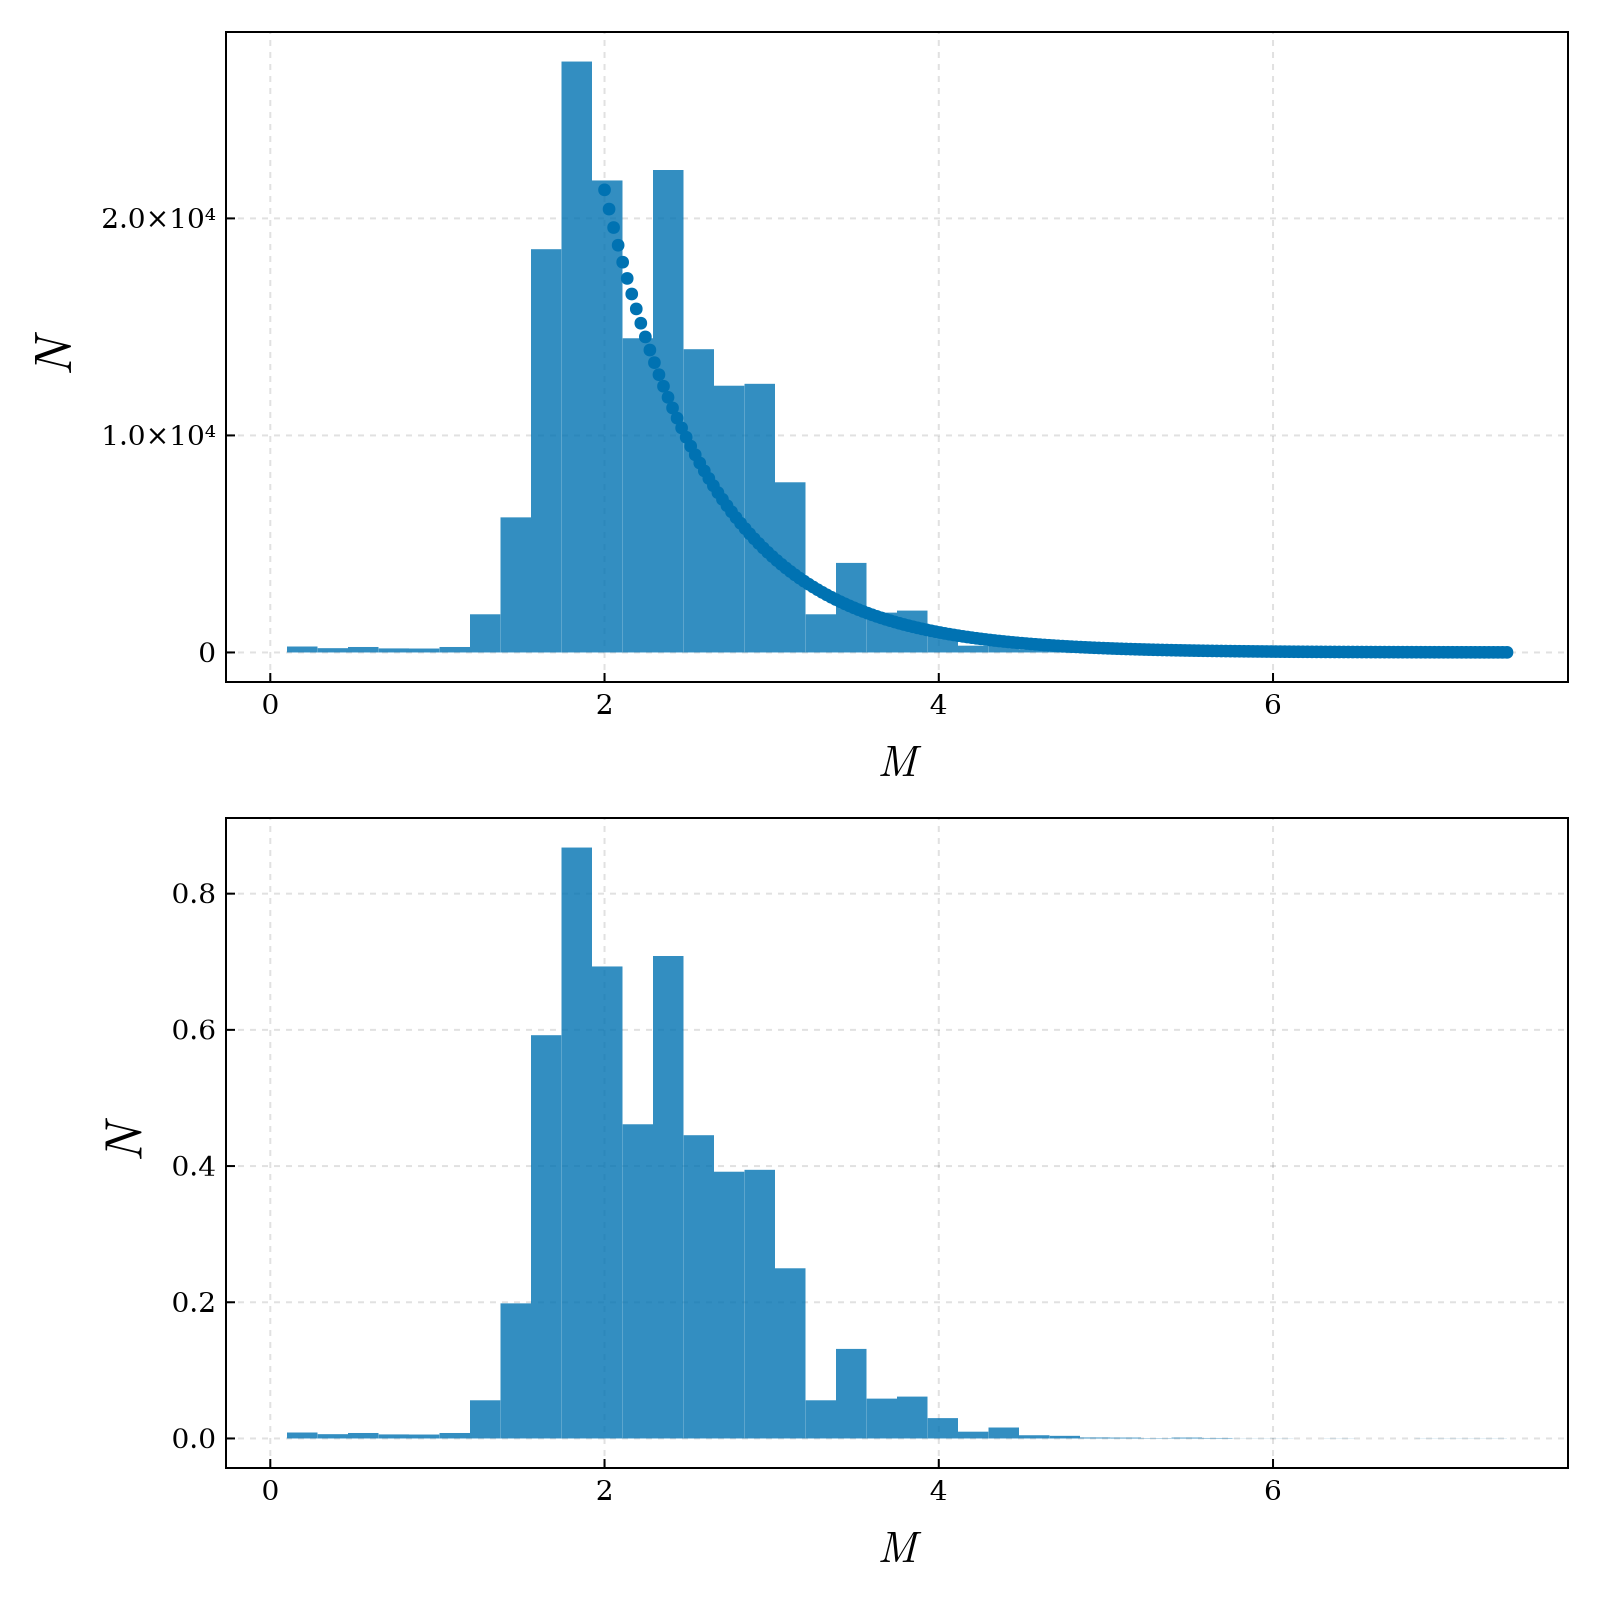

In [163]:
set_theme!(Theme(fonts=(; regular="CMU Serif")))
fig = Figure(size = (800, 800), font= "CMU Serif",) ## probably you need to install this font in your system

ax1 = Axis(fig[1, 1], xlabel = L"M", ylabel = L"N", ylabelsize = 26, #yscale=log10, # xscale = log10,
xlabelsize = 22, xgridstyle = :dash, ygridstyle = :dash, xtickalign = 1,
xticksize = 5, ytickalign = 1, yticksize = 5 , xlabelpadding = 10, ylabelpadding = 10)

ax2 = Axis(fig[2, 1], xlabel = L"M", ylabel = L"N", ylabelsize = 26, #yscale=log10, # xscale = log10,
xlabelsize = 22, xgridstyle = :dash, ygridstyle = :dash, xtickalign = 1,
xticksize = 5, ytickalign = 1, yticksize = 5 , xlabelpadding = 10, ylabelpadding = 10)

plot!(ax1, x, y)
hist!(ax1, df[:,:Magnitude] , bins = 40, label = "number of events", normalization=:density)

# hist!(ax1, df[:,:Magnitude] ./ (10 .^ a_value) , bins = 40, label = "number of events",)


hist!(ax2, df[:,:Magnitude] , bins = 40, label = "number of events", normalization=:pdf)

# axislegend(ax, position = :rt, backgroundcolor = (:grey90, 0.25), labelsize=18);

# save("./eda_results/$region/$(region)_histogram_events_magnitudes.png",fig, px_per_unit=5)
return fig

In [144]:
using PyCall

@pyimport powerlaw as powlaw
so = pyimport("scipy.optimize")

PyObject <module 'scipy.optimize' from '/home/anicolin/.local/lib/python3.10/site-packages/scipy/optimize/__init__.py'>

In [145]:
x_mags_ccdf, y_mags_ccdf = powlaw.ccdf(magnitudes)

([2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9  …  5.3, 5.4, 5.5, 5.6, 5.8, 6.0, 6.4, 6.9, 7.1, 7.4], [1.0, 0.91691686995684, 0.8138018389941828, 0.6898573841246012, 0.5585006567836367, 0.4995308688309251, 0.4289735410020642, 0.37990242071683245, 0.31286357665603304, 0.2746762994933384  …  0.0009382623381497535, 0.0007975229874273015, 0.0007036967536122596, 0.00046913116907487673, 0.00028147870144490383, 0.00023456558453738285, 0.0001876524676299729, 0.00014073935072245192, 9.382623381493094e-5, 4.691311690752098e-5])

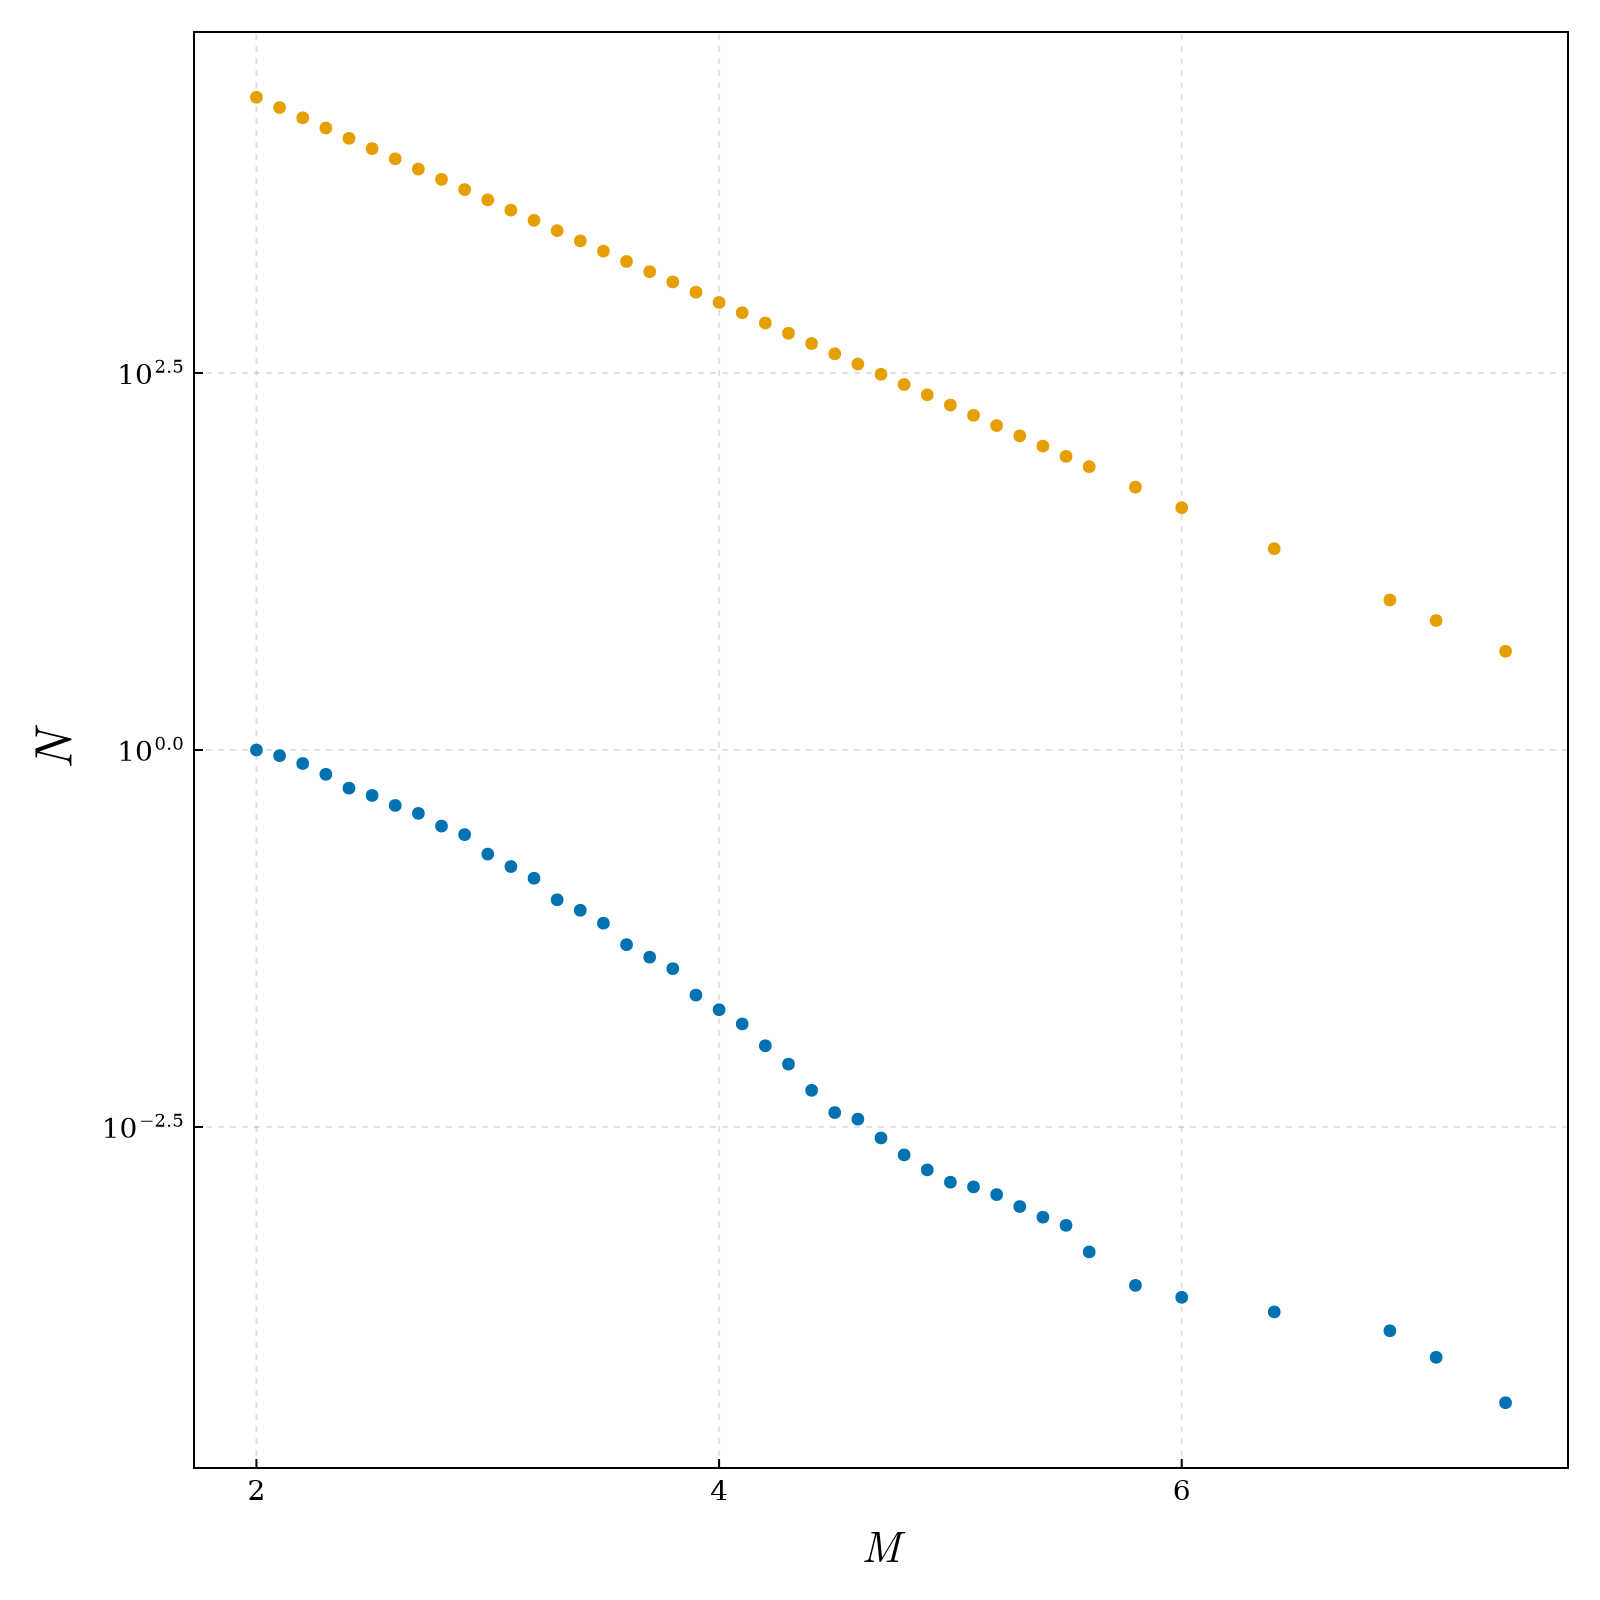

In [147]:
set_theme!(Theme(fonts=(; regular="CMU Serif")))
fig = Figure(size = (800, 800), font= "CMU Serif",) ## probably you need to install this font in your system

ax1 = Axis(fig[1, 1], xlabel = L"M", ylabel = L"N", ylabelsize = 26, yscale=log10, # xscale = log10,
xlabelsize = 22, xgridstyle = :dash, ygridstyle = :dash, xtickalign = 1,
xticksize = 5, ytickalign = 1, yticksize = 5 , xlabelpadding = 10, ylabelpadding = 10)



plot!(ax1, x_mags_ccdf, y_mags_ccdf)
plot!(ax1, x_mags_ccdf, 10 .^ (a_value .- b_value .* x_mags_ccdf))

# axislegend(ax, position = :rt, backgroundcolor = (:grey90, 0.25), labelsize=18);

# save("./eda_results/$region/$(region)_histogram_events_magnitudes.png",fig, px_per_unit=5)
return fig